#### You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

#### 1. Pregnancies: Number of times pregnant (integer)

#### 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

#### 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

#### 4. SkinThickness: Triceps skin fold thickness (mm) (integer)

#### 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

#### 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

#### 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)

#### 8. Age: Age in years (integer)
#### 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

#### Here’s the dataset link:https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

#### Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical into dummy variables if necessary.

#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

#### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

#### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

#### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

### Answers

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/tmp/ipykernel_1294/1203768356.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


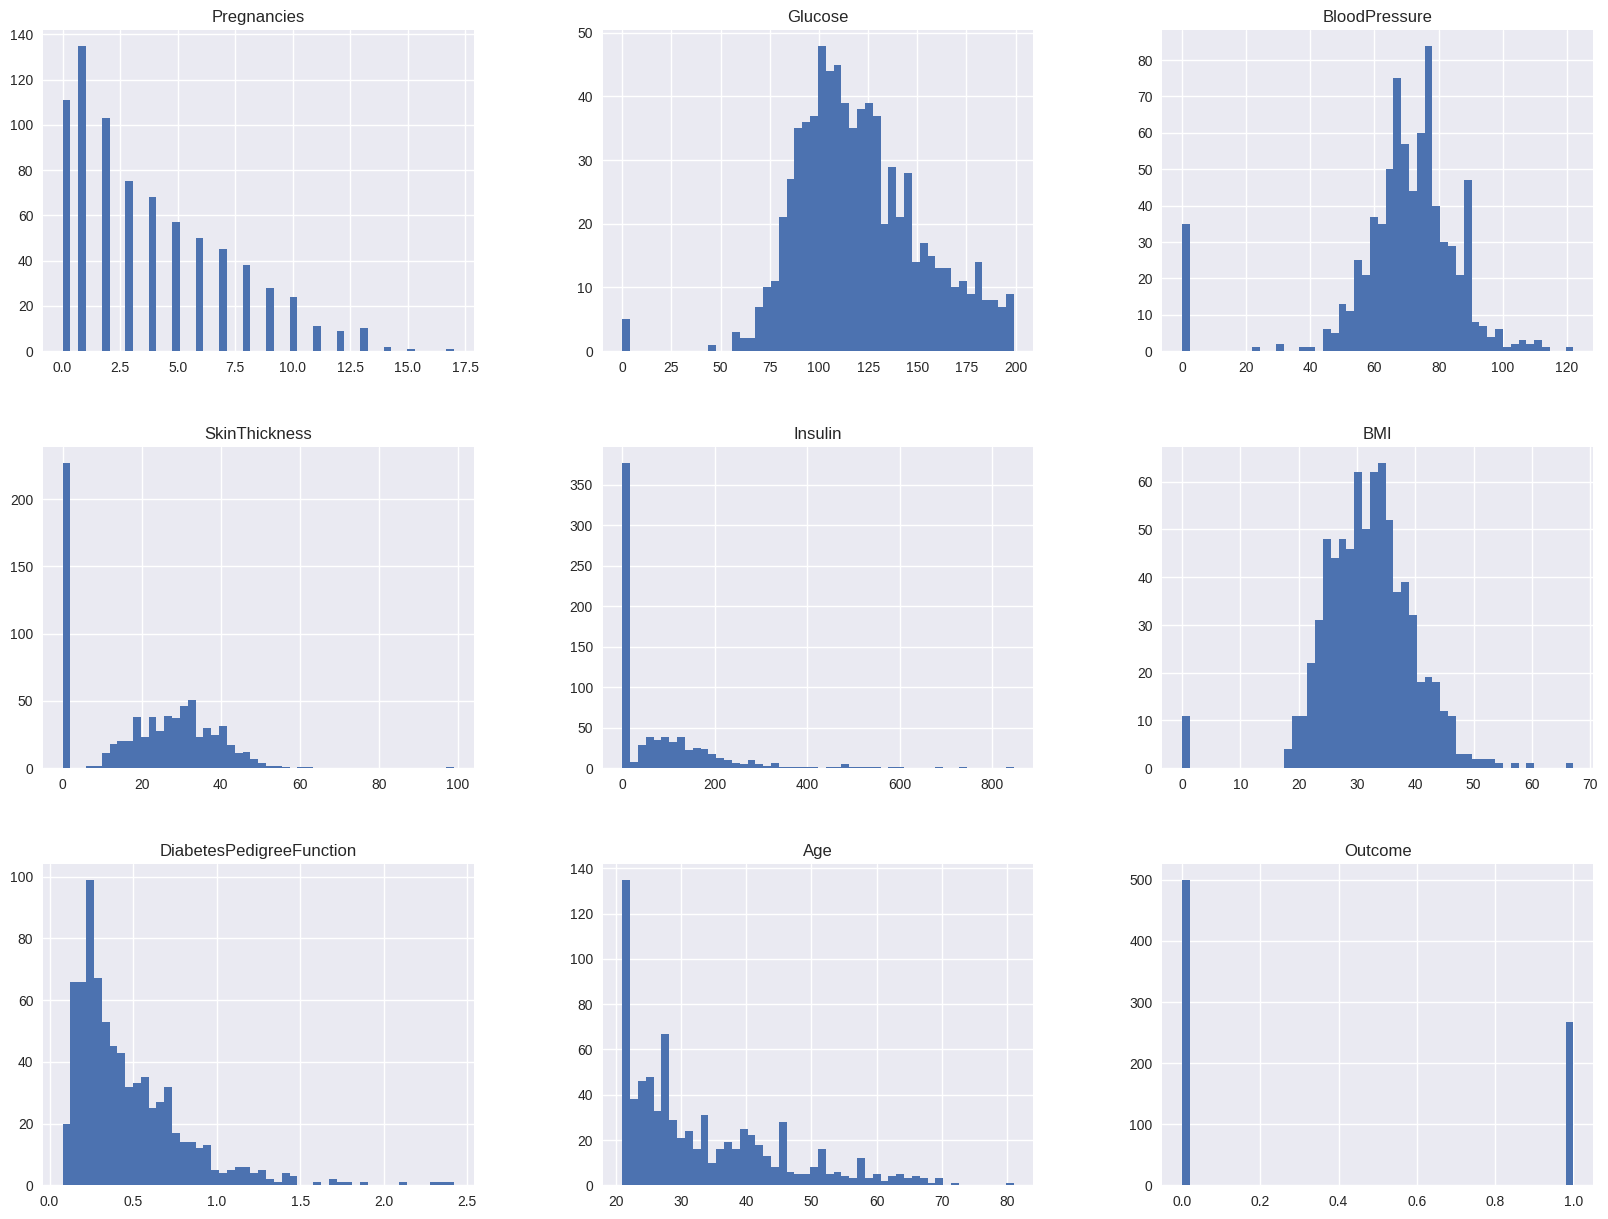

In [4]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical into dummy variables if necessary.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###### categorical variable is not present so no need to transfprmation

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### Not any Missing value

/tmp/ipykernel_1294/1509355988.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


<AxesSubplot: >

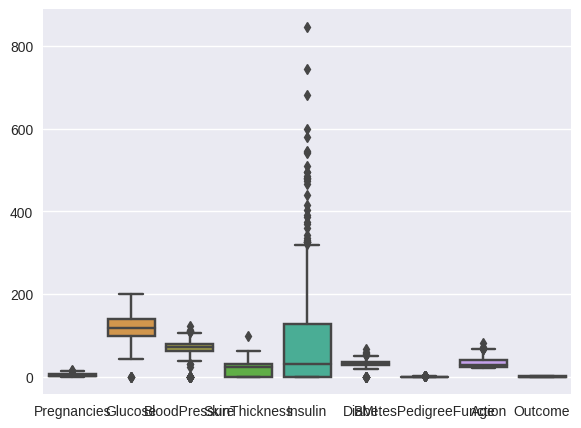

In [7]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df)

##### Not much outlire is present 

#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.



In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train,X_test,y_train,y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 357           13      129              0             30        0  39.9   
 73             4      129             86             20      270  35.1   
 352            3       61             82             28        0  34.4   
 497            2       81             72             15       76  30.1   
 145            0      102             75             23        0   0.0   
 ..           ...      ...            ...            ...      ...   ...   
 71             5      139             64             35      140  28.6   
 106            1       96            122              0        0  22.4   
 270           10      101             86             37        0  45.6   
 435            0      141              0              0        0  42.4   
 102            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age  
 357                     0.569   44  
 73                   

#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.



In [13]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

In [15]:
parameter={ 'criterion':['gini', 'entropy', 'log_loss'],
             'splitter':['best','random'],
           'max_depth':[1,2,3,4,5],
           'max_features':['auto','sqrt','log2']

}

In [16]:
clf_gscv=GridSearchCV(clf,param_grid=parameter,cv=5,scoring='accuracy')

In [17]:
clf_gscv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [18]:
clf_gscv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [19]:
new_clf=DecisionTreeClassifier(criterion= 'log_loss',
 max_depth= 3,
 max_features= 'log2',
 splitter= 'best')

In [20]:
new_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=3, max_features='log2')

#### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.



In [21]:
y_pred=new_clf.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, confusion_matrix
score=accuracy_score(y_pred,y_test)
score

0.6875

In [23]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.71      0.78       153\n           1       0.35      0.62      0.44        39\n\n    accuracy                           0.69       192\n   macro avg       0.61      0.66      0.61       192\nweighted avg       0.77      0.69      0.71       192\n'

In [24]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

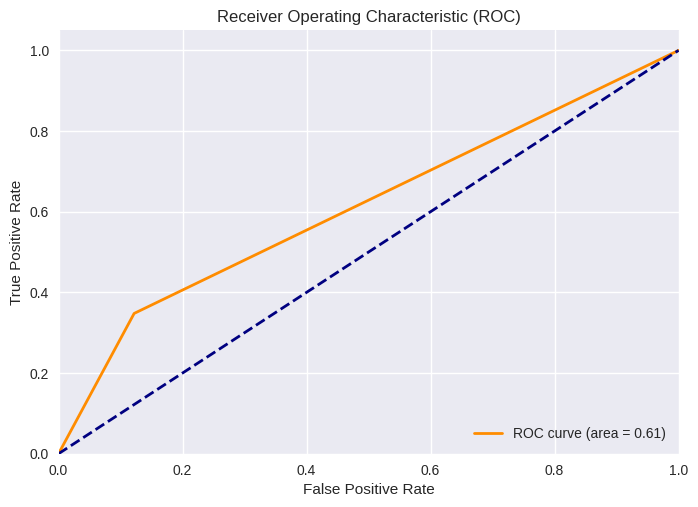

In [25]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.



In [26]:
from sklearn.tree import DecisionTreeClassifier

# Train the decision tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Access the decision tree structure
tree_structure = clf.tree_


In [27]:
tree_structure

[Text(0.5585565476190476, 0.9642857142857143, 'x[1] <= 143.5\ngini = 0.452\nsamples = 576\nvalue = [377, 199]'),
 Text(0.2552083333333333, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.36\nsamples = 454\nvalue = [347, 107]'),
 Text(0.1392857142857143, 0.8214285714285714, 'x[1] <= 127.5\ngini = 0.208\nsamples = 246\nvalue = [217, 29]'),
 Text(0.07857142857142857, 0.75, 'x[5] <= 49.1\ngini = 0.134\nsamples = 208\nvalue = [193, 15]'),
 Text(0.06904761904761905, 0.6785714285714286, 'x[5] <= 31.4\ngini = 0.118\nsamples = 206\nvalue = [193, 13]'),
 Text(0.01904761904761905, 0.6071428571428571, 'x[6] <= 0.672\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.009523809523809525, 0.5357142857142857, 'gini = 0.0\nsamples = 103\nvalue = [103, 0]'),
 Text(0.02857142857142857, 0.5357142857142857, 'x[6] <= 0.697\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.01904761904761905, 0.4642857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0380952380952381, 0.4642857142857143,

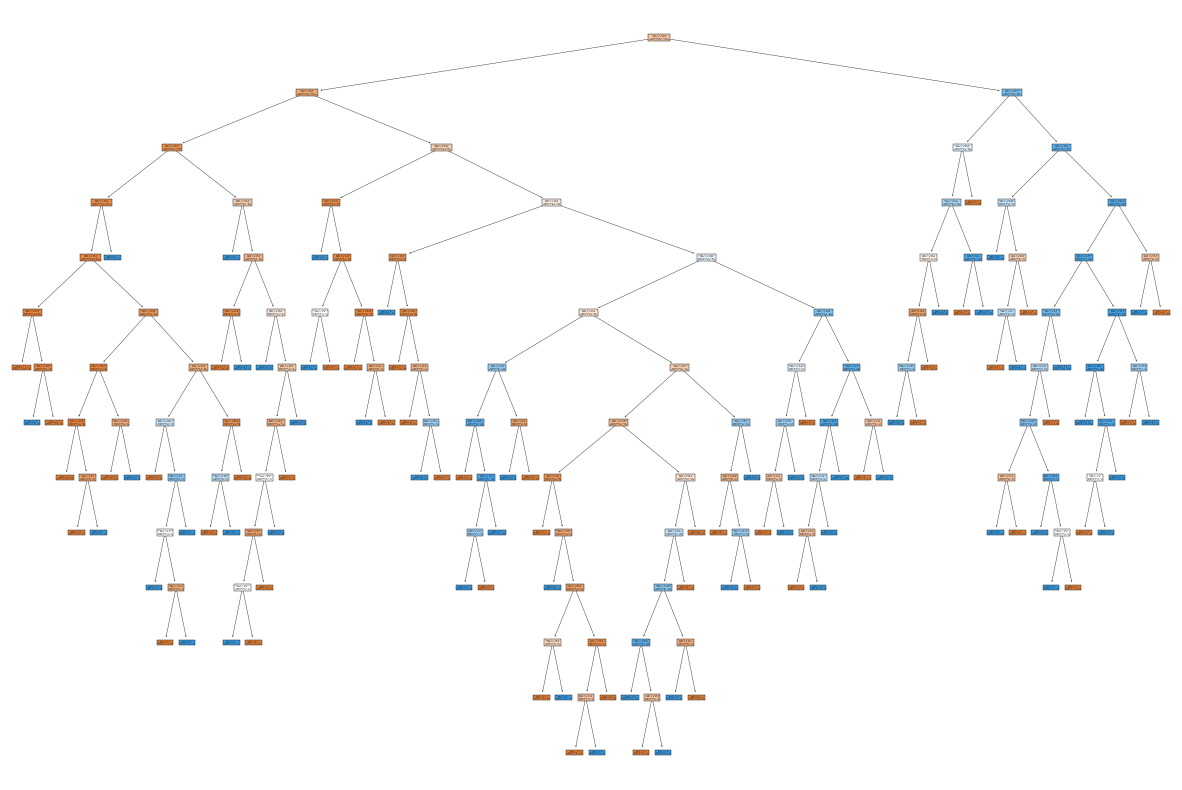

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [29]:
def analyze_tree(node_id=0):
    if tree_structure.feature[node_id] != -2:  # Internal node
        feature = df.columns
        threshold = tree_structure.threshold[node_id]
        print(f"Node {node_id}: Split on {feature} at threshold {threshold}")
        analyze_tree(tree_structure.children_left[node_id])
        analyze_tree(tree_structure.children_right[node_id])
    else:  # Leaf node
        value = tree_structure.value[node_id][0]
        print(f"Node {node_id}: Leaf with value {value}")

# Start analyzing the tree from the root
analyze_tree()

Node 0: Split on Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') at threshold 143.5
Node 1: Split on Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') at threshold 28.5
Node 2: Split on Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') at threshold 127.5
Node 3: Split on Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') at threshold 49.10000038146973
Node 4: Split on Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') at threshold 31.4000005

#### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [36]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.tree import DecisionTreeRegressor

# Train the decision tree model
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error

# Generate perturbed data by adding noise to the test set
X_test_perturbed = X_test + np.random.normal(0, 0.1, size=X_test.shape)

# Make predictions on the perturbed data
y_pred_perturbed = clf.predict(X_test_perturbed)

# Evaluate model performance on the perturbed data
mse_perturbed = mean_squared_error(y_test, y_pred_perturbed)
print("Mean Squared Error (Perturbed Data):", mse_perturbed)


Mean Squared Error (Perturbed Data): 9715.752808988764


In [39]:
# Create a scenario by selecting a subset of data
X_scenario, y_scenario = X_test[:50], y_test[:50]

# Make predictions on the scenario data
y_pred_scenario = clf.predict(X_scenario)

# Evaluate model performance on the scenario data
mse_scenario = mean_squared_error(y_scenario, y_pred_scenario)
print("Mean Squared Error (Scenario Data):", mse_scenario)


Mean Squared Error (Scenario Data): 4620.62
